In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import os
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
sess = tf.Session()

def gaussian(x,sigma,mu):
    #分散共分散行列の行列式
    det = np.linalg.det(sigma)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim
    tmp = (x - mu).dot(inv)
    diag = np.sum(tmp*(x - mu),axis=1)
    return np.exp(-diag/2.0) / (np.sqrt((2 * np.pi) ** n * det))

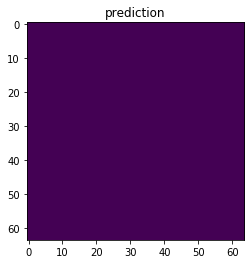

1.0


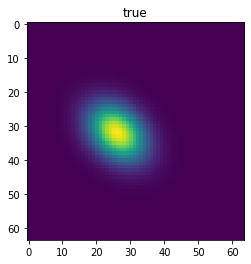

0.9999986216701844


array([[6.99984202e-12, 1.19733592e-11, 1.97835072e-11, ...,
        3.48148580e-25, 7.20148082e-26, 1.43892609e-26],
       [1.57275097e-11, 2.71949267e-11, 4.54229485e-11, ...,
        1.51372127e-24, 3.16521525e-25, 6.39322641e-26],
       [3.41343144e-11, 5.96649487e-11, 1.00741139e-10, ...,
        6.35750478e-24, 1.34382956e-24, 2.74385515e-25],
       ...,
       [5.84582156e-18, 1.93500855e-17, 6.18699439e-17, ...,
        8.97026223e-14, 3.59064012e-14, 1.38834730e-14],
       [1.58835174e-18, 5.31476634e-18, 1.71783389e-17, ...,
        4.71645646e-14, 1.90845853e-14, 7.45948976e-15],
       [4.16876403e-19, 1.41008392e-18, 4.60725348e-18, ...,
        2.39544397e-14, 9.79835278e-15, 3.87150322e-15]])

In [34]:
X, Y = np.meshgrid(np.arange(0, 64, 1), np.arange(0, 64, 1)) # X座標,Y座標


# img = np.reshape(gaussian(np.c_[X.ravel(),Y.ravel()], np.array([[24,10],[10,42]]), [50,29]),[64,64])
img = np.ones([64,64])/4096
plt.imshow(img)
plt.title("prediction")
plt.show()
print(np.sum(img))
x = tf.Variable(img) #予測値


img = np.reshape(gaussian(np.c_[X.ravel(),Y.ravel()], np.array([[32,10],[10,32]]), [26,32]),[64,64])
plt.imshow(img)
plt.title("true")
plt.show()
print(np.sum(img))
y = tf.Variable(img) #真値
img

In [6]:
def compKL(p1,p2,smallV=1e-10):
    kl = tf.reduce_sum(p1*(tf.math.log(p1+smallV) - tf.math.log(p2+smallV)))
    return kl

In [40]:
kl_loss = compKL(x,y)
grad = tf.gradients(kl_loss,x)[0]

smallV=1e-10
grad2 = tf.math.log((x+smallV)/(y+smallV))+1

sess.run(tf.global_variables_initializer())

-0.0016777209129386073


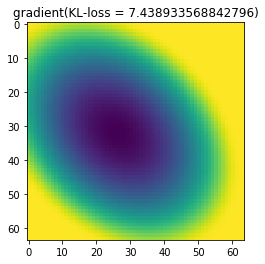

[[15.64042759 15.59499397 15.52756894 ... 15.70808476 15.70808476
  15.70808476]
 [15.56201658 15.46753418 15.33360857 ... 15.70808476 15.70808476
  15.70808476]
 [15.41441331 15.2401774  15.01123874 ... 15.70808476 15.70808476
  15.70808476]
 ...
 [15.7080847  15.70808457 15.70808414 ... 15.70718814 15.70772576
  15.70794594]
 [15.70808475 15.70808471 15.70808459 ... 15.70761323 15.70789394
  15.70801017]
 [15.70808476 15.70808475 15.70808472 ... 15.70784525 15.70798678
  15.70804605]]


In [58]:
grad_value, grad2_value, kl_value = sess.run([grad,grad2,kl_loss])
print(np.sum(grad_value - grad2_value))
plt.imshow(grad_value)
plt.title("gradient(KL-loss = {})".format(kl_value))
plt.show()

print(grad_value)

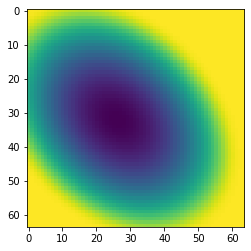

In [59]:
plt.imshow(grad2_value)

In [49]:
grad2_value

array([[15.640428  , 15.59499438, 15.52756935, ..., 15.70808517,
        15.70808517, 15.70808517],
       [15.56201699, 15.46753459, 15.33360898, ..., 15.70808517,
        15.70808517, 15.70808517],
       [15.41441371, 15.24017781, 15.01123915, ..., 15.70808517,
        15.70808517, 15.70808517],
       ...,
       [15.70808511, 15.70808498, 15.70808455, ..., 15.70718855,
        15.70772617, 15.70794635],
       [15.70808516, 15.70808512, 15.708085  , ..., 15.70761364,
        15.70789435, 15.70801058],
       [15.70808517, 15.70808516, 15.70808513, ..., 15.70784566,
        15.70798719, 15.70804646]])